In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import os
import random
from collections import Counter

# Image Processing
import cv2  # OpenCV for image processing
from PIL import Image

# Feature Extraction
from skimage.feature import graycomatrix, graycoprops, local_binary_pattern
from skimage import img_as_ubyte
from scipy.stats import entropy

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Handle imbalance using Random Oversampler
from imblearn.over_sampling import RandomOverSampler

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# folder1 = 'Dataset\HAM10000_images_part_1'
# folder2 = 'Dataset\HAM10000_images_part_2'

# image_dict = {}

# def load_images_to_dict(folder, image_dict):
#     for filename in os.listdir(folder):
#         if filename.endswith(('.jpg', '.jpeg', '.png')):  
#             file_path = os.path.join(folder, filename)
#             image = cv2.imread(file_path)  
#             image_dict[filename] = image

# load_images_to_dict(folder1, image_dict)
# load_images_to_dict(folder2, image_dict)
# print(f"Total images loaded: {len(image_dict)}")

In [3]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [4]:
# df = pd.read_csv('Dataset\HAM10000_metadata.csv')
# df.head(3)

In [5]:
# # Count the number of images for each lesion type
# lesion_counts = df['dx'].value_counts()

# # Map lesion types to their descriptive names
# lesion_counts.index = lesion_counts.index.map(lesion_type_dict)

# # Plot the bar graph
# plt.figure(figsize=(12, 8))
# lesion_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# # Add labels and title
# plt.xlabel('Lesion Type')
# plt.ylabel('Number of Images')
# plt.title('Number of Images per Lesion Type')
# plt.xticks(rotation=30, ha='right')
# plt.tight_layout()

# # Show the plot
# plt.show()

In [ ]:
# # Function to extract color features
# def extract_color_features(image):
#     # Convert the image to HSV
#     hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

#     # Calculate mean and standard deviation of RGB channels
#     mean_rgb = np.mean(image, axis=(0, 1))
#     std_rgb = np.std(image, axis=(0, 1))

#     # Calculate HSV statistics (mean and standard deviation)
#     mean_hsv = np.mean(hsv_image, axis=(0, 1))
#     std_hsv = np.std(hsv_image, axis=(0, 1))

#     # Color histogram for RGB channels
#     hist_r = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()
#     hist_g = cv2.calcHist([image], [1], None, [256], [0, 256]).flatten()
#     hist_b = cv2.calcHist([image], [2], None, [256], [0, 256]).flatten()

#     # Dominant colors using KMeans clustering
#     reshaped_image = image.reshape((-1, 3))
#     kmeans = KMeans(n_clusters=3, random_state=42).fit(reshaped_image)
#     dominant_colors = kmeans.cluster_centers_.flatten()

#     # Combine all features
#     features = np.concatenate([mean_rgb, std_rgb, mean_hsv, std_hsv, hist_r[:10], hist_g[:10], hist_b[:10], dominant_colors])
#     return features

In [7]:
# # Function to extract texture features
# def extract_texture_features(image):
#     # Convert to grayscale
#     gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#     # GLCM (Gray Level Co-occurrence Matrix) properties
#     glcm = graycomatrix(gray_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
#     contrast = graycoprops(glcm, 'contrast')[0, 0]
#     energy = graycoprops(glcm, 'energy')[0, 0]
#     homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]

#     # Local Binary Pattern (LBP)
#     lbp = cv2.Laplacian(gray_image, cv2.CV_64F)
#     lbp_hist, _ = np.histogram(lbp, bins=10, range=(-5, 5))
#     lbp_features = lbp_hist / lbp_hist.sum()

#     # Entropy
#     entropy = -np.sum(gray_image / 255.0 * np.log2(gray_image / 255.0 + 1e-5))

#     # Combine all texture features
#     features = np.concatenate([[contrast, energy, homogeneity], lbp_features, [entropy]])
#     return features

In [8]:
# #Generate the DataFrame for storing features
# columns = [
#     'image_id', 'lesion_type',
#     'mean_r', 'mean_g', 'mean_b', 'std_r', 'std_g', 'std_b',
#     'mean_h', 'mean_s', 'mean_v', 'std_h', 'std_s', 'std_v',
#     *['hist_r_'+str(i) for i in range(10)],
#     *['hist_g_'+str(i) for i in range(10)],
#     *['hist_b_'+str(i) for i in range(10)],
#     *['dominant_color_'+str(i) for i in range(9)],
#     'contrast', 'energy', 'homogeneity', *['lbp_'+str(i) for i in range(10)], 'entropy'
# ]

# feature_df = pd.DataFrame(columns=columns)

In [9]:
# progress_count = 0

# for _, row in df.iterrows():
#     image_id = row['image_id'] + '.jpg'
#     lesion_type = lesion_type_dict[row['dx']]
    
#     if image_id in image_dict:
#         image = image_dict[image_id]
        
#         # Extract features
#         color_features = extract_color_features(image)
#         texture_features = extract_texture_features(image)
        
#         # Combine all features
#         all_features = [image_id, lesion_type] + list(color_features) + list(texture_features)
#         feature_df.loc[len(feature_df)] = all_features
    
#     progress_count += 1
#     print(f"\rProgress: {progress_count}/{len(df)}", end='')

# print("\nFeature extraction completed!")

In [10]:
# feature_df.shape

In [11]:
# feature_df.shape

In [12]:
# feature_df.to_csv('lesion_features.csv', index=False)
# print("Features saved to lesion_features.csv")

In [13]:
feature_df = pd.read_csv('E:\DIP LAB\Project\lesion_features.csv')
feature_df.head(3)

,image_id,lesion_type,mean_r,mean_g,mean_b,std_r,std_g,std_b,mean_h,mean_s,...,lbp_1,lbp_2,lbp_3,lbp_4,lbp_5,lbp_6,lbp_7,lbp_8,lbp_9,entropy
0,ISIC_0027419.jpg,Benign keratosis-like lesions,181.659333,162.703426,208.736267,29.102601,20.242145,12.006975,149.605474,58.098915,...,0.078523,0.092016,0.102859,0.111923,0.113587,0.109575,0.100938,0.089153,0.136302,95649.267985
1,ISIC_0025030.jpg,Benign keratosis-like lesions,177.196333,156.542415,197.138056,38.629621,34.343645,36.200990,151.438567,55.551526,...,0.080173,0.092688,0.104879,0.110328,0.112645,0.108533,0.099525,0.088173,0.136808,97716.833033
2,ISIC_0026769.jpg,Benign keratosis-like lesions,174.070967,156.414959,214.053785,22.837293,18.259477,13.762860,158.419381,69.424844,...,0.077080,0.092025,0.103081,0.111968,0.115479,0.112429,0.101912,0.089181,0.135806,98765.725932


In [14]:
feature_df['lesion_type'].value_counts()

lesion_type
Melanocytic nevi                  6705
Melanoma                          1113
Benign keratosis-like lesions     1099
Basal cell carcinoma               514
Actinic keratoses                  327
Vascular lesions                   142
Dermatofibroma                     115
Name: count, dtype: int64

In [15]:
# Split the dataset into X (features) and y (labels)
# Exclude the columns for 'image_id' and 'lesion_type' from X
X = feature_df.drop(columns=['image_id', 'lesion_type'])

# Use 'lesion_type' as the label (y)
y = feature_df['lesion_type']

# Convert X to a NumPy array for training
X = X.values

# Display the shapes of X and y
print(f"Features shape (X): {X.shape}")
print(f"Labels shape (y): {y.shape}")

Features shape (X): (10015, 65)
Labels shape (y): (10015,)


In [16]:
# Initialize Random Oversampler
ros = RandomOverSampler(random_state=42)

# Resample the dataset
X_ros, y_ros = ros.fit_resample(X, y)

# Display class distribution after resampling
print("Class distribution after Random Oversampling:", Counter(y_ros))

# Check shapes
print(f"Resampled Features shape (X_ros): {X_ros.shape}")
print(f"Resampled Labels shape (y_ros): {y_ros.shape}")

Class distribution after Random Oversampling: Counter({'Benign keratosis-like lesions ': 6705, 'Melanocytic nevi': 6705, 'Dermatofibroma': 6705, 'Melanoma': 6705, 'Vascular lesions': 6705, 'Basal cell carcinoma': 6705, 'Actinic keratoses': 6705})
Resampled Features shape (X_ros): (46935, 65)
Resampled Labels shape (y_ros): (46935,)


In [17]:
# Split the Random Oversampled data
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(
    X_ros, y_ros, test_size=0.3, random_state=42, stratify=y_ros
)

# Display shapes of train and test sets
print(f"Random Oversampled Training set shape (X_train_ros): {X_train_ros.shape}")
print(f"Random Oversampled Testing set shape (X_test_ros): {X_test_ros.shape}")
print(f"Random Oversampled Training labels shape (y_train_ros): {y_train_ros.shape}")
print(f"Random Oversampled Testing labels shape (y_test_ros): {y_test_ros.shape}")

Random Oversampled Training set shape (X_train_ros): (32854, 65)
Random Oversampled Testing set shape (X_test_ros): (14081, 65)
Random Oversampled Training labels shape (y_train_ros): (32854,)
Random Oversampled Testing labels shape (y_test_ros): (14081,)


In [18]:
# Initialize the Label Encoder
label_encoder = LabelEncoder()

# Fit and transform on training labels
y_train_encoded = label_encoder.fit_transform(y_train_ros)

# Transform on testing labels
y_test_encoded = label_encoder.transform(y_test_ros)

# Mapping of original labels to encoded labels
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Print the label mapping for reference
print("Label Encoding Mapping:")
print(label_mapping)


Label Encoding Mapping:
{'Actinic keratoses': 0, 'Basal cell carcinoma': 1, 'Benign keratosis-like lesions ': 2, 'Dermatofibroma': 3, 'Melanocytic nevi': 4, 'Melanoma': 5, 'Vascular lesions': 6}


In [19]:
# Reverse mapping from full name to abbreviation
reverse_lesion_type_dict = {v: k for k, v in lesion_type_dict.items()}

# Generate heatmap labels using reverse mapping
heatmap_labels = [reverse_lesion_type_dict[key] for key in label_mapping.keys()]
print("Heatmap Labels:", heatmap_labels)

Heatmap Labels: ['akiec', 'bcc', 'bkl', 'df', 'nv', 'mel', 'vasc']


Logistic Regression - Evaluation Metrics
Accuracy: 0.3713

Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.26      0.28      2011
           1       0.36      0.37      0.37      2011
           2       0.35      0.43      0.38      2012
           3       0.31      0.15      0.20      2012
           4       0.40      0.50      0.45      2012
           5       0.43      0.47      0.45      2011
           6       0.38      0.43      0.40      2012

    accuracy                           0.37     14081
   macro avg       0.36      0.37      0.36     14081
weighted avg       0.36      0.37      0.36     14081

ROC AUC Score: 0.7478


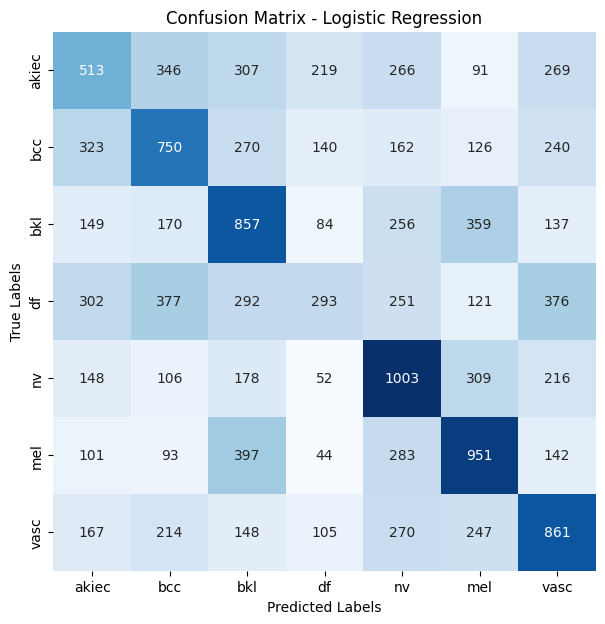

In [20]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logreg_model.fit(X_train_ros, y_train_encoded)

# Predict on the test data
y_pred = logreg_model.predict(X_test_ros)

# Calculate and display evaluation metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
class_report = classification_report(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, logreg_model.predict_proba(X_test_ros), multi_class='ovr')

# Print the metrics
print("Logistic Regression - Evaluation Metrics")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(class_report)
print(f"ROC AUC Score: {roc_auc:.4f}")
plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=heatmap_labels, yticklabels=heatmap_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

K-Nearest Neighbors - Evaluation Metrics
Accuracy: 0.8830

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2011
           1       0.87      1.00      0.93      2011
           2       0.79      0.91      0.85      2012
           3       0.97      1.00      0.99      2012
           4       0.90      0.38      0.54      2012
           5       0.79      0.89      0.84      2011
           6       0.97      1.00      0.98      2012

    accuracy                           0.88     14081
   macro avg       0.89      0.88      0.87     14081
weighted avg       0.89      0.88      0.87     14081

ROC AUC Score: 0.9703


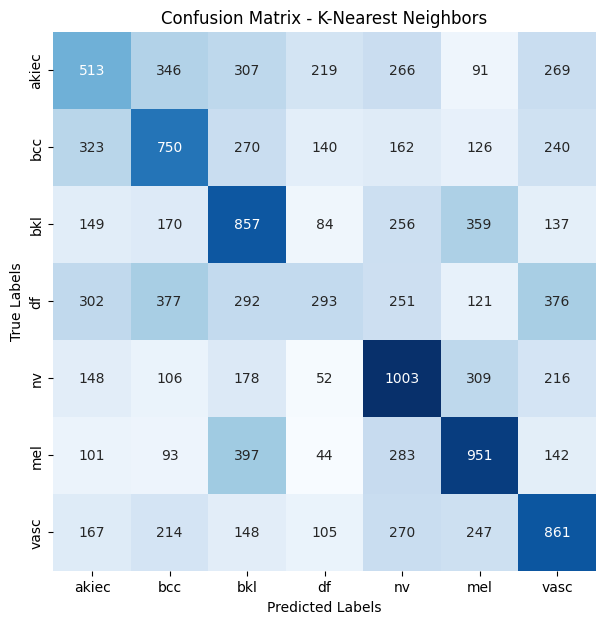

In [21]:
# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed

# Fit the model to the training data
knn_model.fit(X_train_ros, y_train_encoded)

# Predict on the test data
y_pred_knn = knn_model.predict(X_test_ros)

# Calculate and display evaluation metrics
accuracy_knn = accuracy_score(y_test_encoded, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test_encoded, y_pred_knn)
class_report_knn = classification_report(y_test_encoded, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test_encoded, knn_model.predict_proba(X_test_ros), multi_class='ovr')

# Print the metrics
print("K-Nearest Neighbors - Evaluation Metrics")
print(f"Accuracy: {accuracy_knn:.4f}")
print("\nClassification Report:")
print(class_report_knn)
print(f"ROC AUC Score: {roc_auc_knn:.4f}")

#display the confusion matrix using seaborn
plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=heatmap_labels, yticklabels=heatmap_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.show()

Random Forest Classifier - Evaluation Metrics
Accuracy: 0.9817

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2011
           1       0.99      1.00      0.99      2011
           2       0.97      1.00      0.98      2012
           3       1.00      1.00      1.00      2012
           4       0.99      0.88      0.93      2012
           5       0.94      0.99      0.96      2011
           6       1.00      1.00      1.00      2012

    accuracy                           0.98     14081
   macro avg       0.98      0.98      0.98     14081
weighted avg       0.98      0.98      0.98     14081

ROC AUC Score: 0.9998


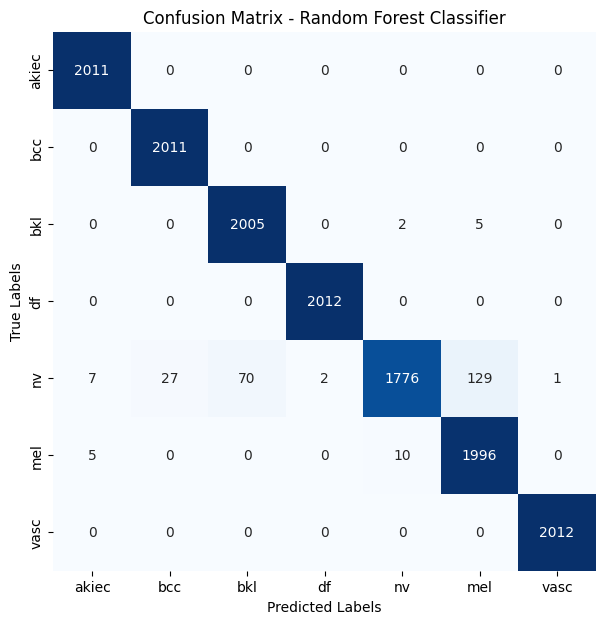

In [22]:
# Initialize the Random Forest model
rfc_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rfc_model.fit(X_train_ros, y_train_encoded)

# Predict on the test data
y_pred_rfc = rfc_model.predict(X_test_ros)

# Calculate and display evaluation metrics
accuracy_rfc = accuracy_score(y_test_encoded, y_pred_rfc)
conf_matrix_rfc = confusion_matrix(y_test_encoded, y_pred_rfc)
class_report_rfc = classification_report(y_test_encoded, y_pred_rfc)
roc_auc_rfc = roc_auc_score(y_test_encoded, rfc_model.predict_proba(X_test_ros), multi_class='ovr')

# Print the metrics
print("Random Forest Classifier - Evaluation Metrics")
print(f"Accuracy: {accuracy_rfc:.4f}")
print("\nClassification Report:")
print(class_report_rfc)
print(f"ROC AUC Score: {roc_auc_rfc:.4f}")
plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix_rfc, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=heatmap_labels, yticklabels=heatmap_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

In [23]:
# %% [13] Save the Random Forest Classifier model
import joblib

# Save the trained model to a file
joblib.dump(rfc_model, 'random_forest_classifier_model.joblib')

print("Model saved successfully!")

Model saved successfully!


In [24]:
# %% [Hyperparameter Tuning with RandomizedSearchCV]
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings to sample
    cv=3,  # Cross-validation folds
    verbose=2,
    n_jobs=-1,  # Use all processors
    random_state=42
)

# Fit the model
random_search.fit(X_train_ros, y_train_ros)

# Display the best parameters
print("Best Parameters:", random_search.best_params_)

# Train a new model with best parameters
best_rfc = random_search.best_estimator_


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


Random Forest Classifier (Best Parameters) - Evaluation Metrics
Accuracy: 0.9832
ROC AUC Score: 0.9998

Confusion Matrix:
[[2011    0    0    0    0    0    0]
 [   0 2011    0    0    0    0    0]
 [   0    0 2005    0    2    5    0]
 [   0    0    0 2012    0    0    0]
 [   6   31   55    1 1795  124    0]
 [   5    0    0    0    8 1998    0]
 [   0    0    0    0    0    0 2012]]


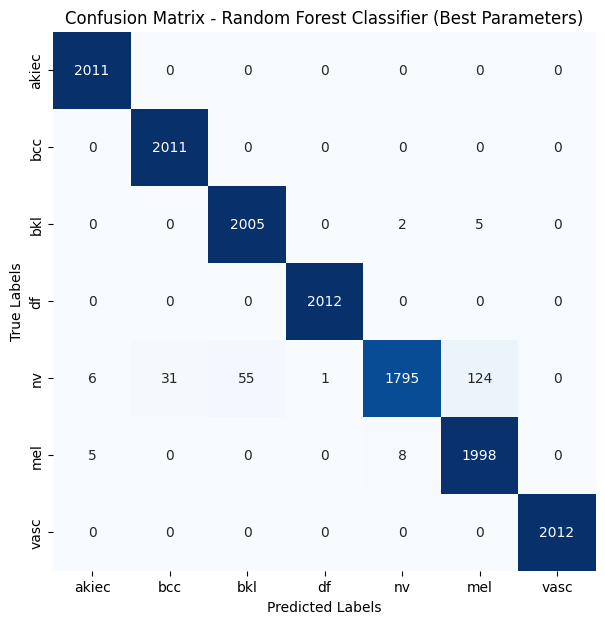

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Evaluate the model
y_pred_best = best_rfc.predict(X_test_ros)

# Calculate evaluation metrics
accuracy_best = accuracy_score(y_test_ros, y_pred_best)
conf_matrix_best = confusion_matrix(y_test_ros, y_pred_best)
class_report_best = classification_report(y_test_ros, y_pred_best)
roc_auc_best = roc_auc_score(y_test_ros, best_rfc.predict_proba(X_test_ros), multi_class='ovr')

# Print the metrics
print("Random Forest Classifier (Best Parameters) - Evaluation Metrics")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"ROC AUC Score: {roc_auc_best:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_best)
#plot the confusion matrix
plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=heatmap_labels, yticklabels=heatmap_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Classifier (Best Parameters)')
plt.show()

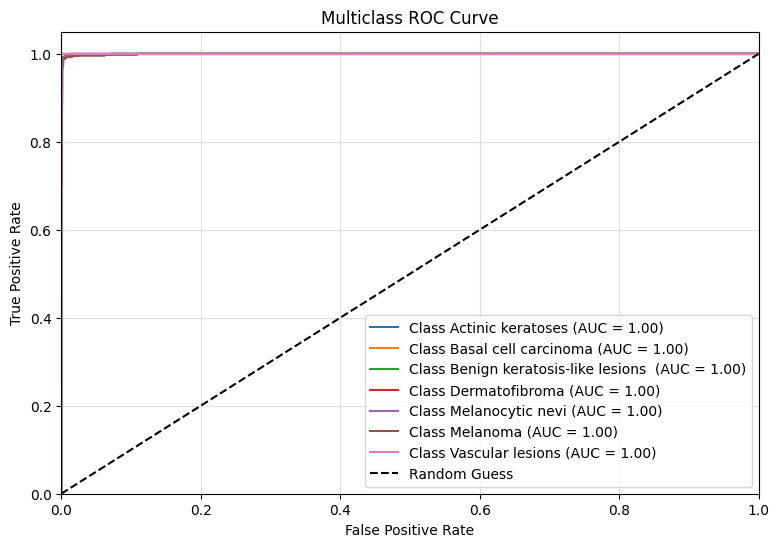

In [26]:
# Binarize the true labels for ROC curve (assuming multiclass classification)
classes = sorted(label_mapping.keys())
y_test_binarized = label_binarize(y_test_ros, classes=classes)
y_score = best_rfc.predict_proba(X_test_ros)

# Plot ROC curve for each class
plt.figure(figsize=(9, 6))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()